In [2]:
#% matplotlib inline
import matplotlib
import numpy as np
import h5py
import ast
import csv
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from keras.utils.io_utils import HDF5Matrix
import numpy as np
from keras.preprocessing import image

import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, MaxPool2D, Flatten, Dense, Dropout, Activation, Input
from keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer

from keras.applications import ResNet50
from keras.applications import InceptionV3
from keras.applications import Xception # TensorFlow ONLY
from keras.applications import VGG16, VGG19, InceptionV3
from keras.applications import imagenet_utils
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping 
import warnings
warnings.filterwarnings('ignore')

In [3]:
import tensorflow as tf
tf.VERSION

'1.14.0'

In [4]:
models_filename = 'v8_vgg16_model_1.h5'
image_dir = 'data'
image_size = (224, 224)
batch_size = 16
epochs = 80

In [5]:
# 5gb of images won't fit in my memory. use datagenerator to go across all images.
train_datagen = ImageDataGenerator(rescale = 1./255,horizontal_flip = False,fill_mode = "nearest",zoom_range = 0,
                                   width_shift_range = 0,height_shift_range=0,rotation_range=0)

train_generator = train_datagen.flow_from_directory(image_dir,target_size = (image_size[0], image_size[1]),
                                                    batch_size = batch_size, class_mode = "categorical")

num_of_classes = len(train_generator.class_indices)

Found 4983 images belonging to 100 classes.


In [7]:
model = VGG16(weights='imagenet', include_top=True)


In [10]:
#Get features (4096 dim)
feat_extractor = Model(input=model.input, output=model.get_layer("fc2").output)

train_generator2 = train_datagen.flow_from_directory('data/', target_size = (image_size[0], image_size[1]),
                                                    batch_size = 1, class_mode = "categorical", shuffle= False)

features = []
file_names = train_generator2.filenames
#print(file_names)
f = open('Image_embeddings.txt', 'a', encoding='utf-8')
for n in range(len(file_names)):
    next_img = train_generator2.next()
    img, classifier = (next_img[0][0],next_img[1][0])
    #if(n>3728):
    print(n)
    feat = feat_extractor.predict(np.asarray([img]))[0]
    #features.append(feat)
    #print(feat[:10])
    result = file_names[n] + ", " + str(list(feat)) + "\n"
    f.write(result)

f.close()

Found 4983 images belonging to 100 classes.
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
26

1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051


3491
3492
3493
3494
3495
3496
3497
3498
3499
3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690


In [11]:
f.close()

In [12]:
#Use 2 dictionaries for text and nlp and create a excel sheet for training data...
f = open('Image_embeddings.txt', encoding='utf-8')
lines = f.readlines()
image_emdb = {}
name = lines[0].split(',')[0]
#print(type(lines[0][len(name)+2:]))
#print(ast.literal_eval(lines[0][len(name)+2:]))
for line in lines:
    name = line.split(',')[0]
    print(name)
    image_emdb[name] = ast.literal_eval(line[len(name)+2:])

apple_pie\0.jpg
apple_pie\1.jpg
apple_pie\10.jpg
apple_pie\11.jpg
apple_pie\12.jpg
apple_pie\13.jpg
apple_pie\14.jpg
apple_pie\15.jpg
apple_pie\16.jpg
apple_pie\17.jpg
apple_pie\18.jpg
apple_pie\19.jpg
apple_pie\2.jpg
apple_pie\20.jpg
apple_pie\21.jpg
apple_pie\22.jpg
apple_pie\23.jpg
apple_pie\24.jpg
apple_pie\25.jpg
apple_pie\26.jpg
apple_pie\27.jpg
apple_pie\28.jpg
apple_pie\29.jpg
apple_pie\3.jpg
apple_pie\30.jpg
apple_pie\31.jpg
apple_pie\32.jpg
apple_pie\33.jpg
apple_pie\34.jpg
apple_pie\35.jpg
apple_pie\36.jpg
apple_pie\37.jpg
apple_pie\38.jpg
apple_pie\39.jpg
apple_pie\4.jpg
apple_pie\40.jpg
apple_pie\41.jpg
apple_pie\42.jpg
apple_pie\43.jpg
apple_pie\44.jpg
apple_pie\45.jpg
apple_pie\46.jpg
apple_pie\47.jpg
apple_pie\48.jpg
apple_pie\49.jpg
apple_pie\5.jpg
apple_pie\50.jpg
apple_pie\51.jpg
apple_pie\52.jpg
apple_pie\53.jpg
apple_pie\54.jpg
apple_pie\55.jpg
apple_pie\56.jpg
apple_pie\57.jpg
apple_pie\58.jpg
apple_pie\59.jpg
apple_pie\6.jpg
apple_pie\7.jpg
apple_pie\8.jpg
apple_

breakfast_burrito\46.jpg
breakfast_burrito\47.jpg
breakfast_burrito\48.jpg
breakfast_burrito\49.jpg
breakfast_burrito\5.jpg
breakfast_burrito\50.jpg
breakfast_burrito\51.jpg
breakfast_burrito\52.jpg
breakfast_burrito\53.jpg
breakfast_burrito\54.jpg
breakfast_burrito\55.jpg
breakfast_burrito\56.jpg
breakfast_burrito\57.jpg
breakfast_burrito\58.jpg
breakfast_burrito\59.jpg
breakfast_burrito\6.jpg
breakfast_burrito\7.jpg
breakfast_burrito\8.jpg
breakfast_burrito\9.jpg
bruschetta\0.jpg
bruschetta\1.jpg
bruschetta\10.jpg
bruschetta\11.jpg
bruschetta\12.jpg
bruschetta\13.jpg
bruschetta\14.jpg
bruschetta\15.jpg
bruschetta\16.jpg
bruschetta\17.jpg
bruschetta\18.jpg
bruschetta\19.jpg
bruschetta\2.jpg
bruschetta\20.jpg
bruschetta\21.jpg
bruschetta\22.jpg
bruschetta\23.jpg
bruschetta\24.jpg
bruschetta\25.jpg
bruschetta\26.jpg
bruschetta\27.jpg
bruschetta\28.jpg
bruschetta\29.jpg
bruschetta\3.jpg
bruschetta\30.jpg
bruschetta\31.jpg
bruschetta\32.jpg
bruschetta\33.jpg
bruschetta\34.jpg
bruschetta\3

chicken_curry\23.jpg
chicken_curry\24.jpg
chicken_curry\25.jpg
chicken_curry\26.jpg
chicken_curry\27.jpg
chicken_curry\28.jpg
chicken_curry\29.jpg
chicken_curry\3.jpg
chicken_curry\30.jpg
chicken_curry\31.jpg
chicken_curry\32.jpg
chicken_curry\33.jpg
chicken_curry\34.jpg
chicken_curry\35.jpg
chicken_curry\36.jpg
chicken_curry\37.jpg
chicken_curry\38.jpg
chicken_curry\39.jpg
chicken_curry\4.jpg
chicken_curry\40.jpg
chicken_curry\41.jpg
chicken_curry\42.jpg
chicken_curry\43.jpg
chicken_curry\44.jpg
chicken_curry\45.jpg
chicken_curry\46.jpg
chicken_curry\47.jpg
chicken_curry\49.jpg
chicken_curry\5.jpg
chicken_curry\50.jpg
chicken_curry\51.jpg
chicken_curry\52.jpg
chicken_curry\53.jpg
chicken_curry\54.jpg
chicken_curry\55.jpg
chicken_curry\57.jpg
chicken_curry\58.jpg
chicken_curry\59.jpg
chicken_curry\6.jpg
chicken_curry\7.jpg
chicken_curry\8.jpg
chicken_curry\9.jpg
chicken_quesadilla\0.jpg
chicken_quesadilla\1.jpg
chicken_quesadilla\10.jpg
chicken_quesadilla\11.jpg
chicken_quesadilla\12.j

club_sandwich\46.jpg
club_sandwich\47.jpg
club_sandwich\48.jpg
club_sandwich\49.jpg
club_sandwich\5.jpg
club_sandwich\50.jpg
club_sandwich\51.jpg
club_sandwich\52.jpg
club_sandwich\53.jpg
club_sandwich\54.jpg
club_sandwich\55.jpg
club_sandwich\56.jpg
club_sandwich\57.jpg
club_sandwich\58.jpg
club_sandwich\59.jpg
club_sandwich\6.jpg
club_sandwich\7.jpg
club_sandwich\8.jpg
club_sandwich\9.jpg
crab_cakes\0.jpg
crab_cakes\1.jpg
crab_cakes\11.jpg
crab_cakes\12.jpg
crab_cakes\13.jpg
crab_cakes\14.jpg
crab_cakes\15.jpg
crab_cakes\17.jpg
crab_cakes\18.jpg
crab_cakes\19.jpg
crab_cakes\2.jpg
crab_cakes\20.jpg
crab_cakes\21.jpg
crab_cakes\22.jpg
crab_cakes\23.jpg
crab_cakes\24.jpg
crab_cakes\25.jpg
crab_cakes\26.jpg
crab_cakes\27.jpg
crab_cakes\28.jpg
crab_cakes\29.jpg
crab_cakes\3.jpg
crab_cakes\30.jpg
crab_cakes\31.jpg
crab_cakes\32.jpg
crab_cakes\33.jpg
crab_cakes\34.jpg
crab_cakes\35.jpg
crab_cakes\36.jpg
crab_cakes\38.jpg
crab_cakes\39.jpg
crab_cakes\4.jpg
crab_cakes\40.jpg
crab_cakes\41.jpg

escargots\7.jpg
falafel\0.jpg
falafel\1.jpg
falafel\10.jpg
falafel\11.jpg
falafel\12.jpg
falafel\13.jpg
falafel\14.jpg
falafel\15.jpg
falafel\16.jpg
falafel\17.jpg
falafel\18.jpg
falafel\19.jpg
falafel\2.jpg
falafel\20.jpg
falafel\21.jpg
falafel\23.jpg
falafel\24.jpg
falafel\25.jpg
falafel\26.jpg
falafel\27.jpg
falafel\28.jpg
falafel\29.jpg
falafel\3.jpg
falafel\30.jpg
falafel\31.jpg
falafel\32.jpg
falafel\33.jpg
falafel\34.jpg
falafel\4.jpg
falafel\5.jpg
falafel\6.jpg
falafel\7.jpg
falafel\8.jpg
falafel\9.jpg
filet_mignon\0.jpg
filet_mignon\1.jpg
filet_mignon\10.jpg
filet_mignon\11.jpg
filet_mignon\12.jpg
filet_mignon\13.jpg
filet_mignon\14.jpg
filet_mignon\15.jpg
filet_mignon\16.jpg
filet_mignon\17.jpg
filet_mignon\18.jpg
filet_mignon\19.jpg
filet_mignon\2.jpg
filet_mignon\20.jpg
filet_mignon\21.jpg
filet_mignon\22.jpg
filet_mignon\23.jpg
filet_mignon\24.jpg
filet_mignon\25.jpg
filet_mignon\26.jpg
filet_mignon\27.jpg
filet_mignon\28.jpg
filet_mignon\29.jpg
filet_mignon\3.jpg
filet_mi

fried_rice\22.jpg
fried_rice\23.jpg
fried_rice\24.jpg
fried_rice\25.jpg
fried_rice\26.jpg
fried_rice\27.jpg
fried_rice\28.jpg
fried_rice\29.jpg
fried_rice\3.jpg
fried_rice\30.jpg
fried_rice\31.jpg
fried_rice\32.jpg
fried_rice\33.jpg
fried_rice\34.jpg
fried_rice\35.jpg
fried_rice\36.jpg
fried_rice\37.jpg
fried_rice\38.jpg
fried_rice\39.jpg
fried_rice\4.jpg
fried_rice\40.jpg
fried_rice\41.jpg
fried_rice\42.jpg
fried_rice\43.jpg
fried_rice\44.jpg
fried_rice\45.jpg
fried_rice\46.jpg
fried_rice\47.jpg
fried_rice\48.jpg
fried_rice\49.jpg
fried_rice\5.jpg
fried_rice\50.jpg
fried_rice\51.jpg
fried_rice\52.jpg
fried_rice\53.jpg
fried_rice\54.jpg
fried_rice\55.jpg
fried_rice\56.jpg
fried_rice\57.jpg
fried_rice\58.jpg
fried_rice\59.jpg
fried_rice\6.jpg
fried_rice\7.jpg
fried_rice\8.jpg
fried_rice\9.jpg
frozen_yogurt\0.jpg
frozen_yogurt\1.jpg
frozen_yogurt\11.jpg
frozen_yogurt\12.jpg
frozen_yogurt\13.jpg
frozen_yogurt\14.jpg
frozen_yogurt\15.jpg
frozen_yogurt\17.jpg
frozen_yogurt\18.jpg
frozen_yog

guacamole\10.jpg
guacamole\11.jpg
guacamole\12.jpg
guacamole\13.jpg
guacamole\14.jpg
guacamole\15.jpg
guacamole\16.jpg
guacamole\17.jpg
guacamole\18.jpg
guacamole\19.jpg
guacamole\2.jpg
guacamole\20.jpg
guacamole\21.jpg
guacamole\22.jpg
guacamole\23.jpg
guacamole\24.jpg
guacamole\25.jpg
guacamole\26.jpg
guacamole\27.jpg
guacamole\28.jpg
guacamole\29.jpg
guacamole\3.jpg
guacamole\30.jpg
guacamole\31.jpg
guacamole\32.jpg
guacamole\33.jpg
guacamole\34.jpg
guacamole\35.jpg
guacamole\36.jpg
guacamole\37.jpg
guacamole\38.jpg
guacamole\39.jpg
guacamole\4.jpg
guacamole\40.jpg
guacamole\41.jpg
guacamole\42.jpg
guacamole\43.jpg
guacamole\44.jpg
guacamole\45.jpg
guacamole\46.jpg
guacamole\47.jpg
guacamole\48.jpg
guacamole\49.jpg
guacamole\5.jpg
guacamole\50.jpg
guacamole\51.jpg
guacamole\52.jpg
guacamole\53.jpg
guacamole\54.jpg
guacamole\55.jpg
guacamole\56.jpg
guacamole\57.jpg
guacamole\58.jpg
guacamole\59.jpg
guacamole\6.jpg
guacamole\7.jpg
guacamole\8.jpg
guacamole\9.jpg
gyoza\0.jpg
gyoza\1.jp

lobster_bisque\37.jpg
lobster_bisque\38.jpg
lobster_bisque\39.jpg
lobster_bisque\4.jpg
lobster_bisque\40.jpg
lobster_bisque\41.jpg
lobster_bisque\42.jpg
lobster_bisque\43.jpg
lobster_bisque\44.jpg
lobster_bisque\45.jpg
lobster_bisque\46.jpg
lobster_bisque\47.jpg
lobster_bisque\48.jpg
lobster_bisque\49.jpg
lobster_bisque\5.jpg
lobster_bisque\50.jpg
lobster_bisque\51.jpg
lobster_bisque\52.jpg
lobster_bisque\53.jpg
lobster_bisque\54.jpg
lobster_bisque\55.jpg
lobster_bisque\56.jpg
lobster_bisque\57.jpg
lobster_bisque\58.jpg
lobster_bisque\59.jpg
lobster_bisque\6.jpg
lobster_bisque\7.jpg
lobster_bisque\8.jpg
lobster_bisque\9.jpg
lobster_roll_sandwich\0.jpg
lobster_roll_sandwich\1.jpg
lobster_roll_sandwich\10.jpg
lobster_roll_sandwich\11.jpg
lobster_roll_sandwich\12.jpg
lobster_roll_sandwich\13.jpg
lobster_roll_sandwich\14.jpg
lobster_roll_sandwich\15.jpg
lobster_roll_sandwich\16.jpg
lobster_roll_sandwich\17.jpg
lobster_roll_sandwich\18.jpg
lobster_roll_sandwich\19.jpg
lobster_roll_sandwich\

omelette\54.jpg
omelette\55.jpg
omelette\56.jpg
omelette\57.jpg
omelette\58.jpg
omelette\59.jpg
omelette\6.jpg
omelette\7.jpg
omelette\8.jpg
omelette\9.jpg
onion_rings\0.jpg
onion_rings\1.jpg
onion_rings\10.jpg
onion_rings\11.jpg
onion_rings\12.jpg
onion_rings\13.jpg
onion_rings\14.jpg
onion_rings\15.jpg
onion_rings\16.jpg
onion_rings\17.jpg
onion_rings\18.jpg
onion_rings\19.jpg
onion_rings\2.jpg
onion_rings\20.jpg
onion_rings\21.jpg
onion_rings\22.jpg
onion_rings\23.jpg
onion_rings\24.jpg
onion_rings\25.jpg
onion_rings\26.jpg
onion_rings\27.jpg
onion_rings\28.jpg
onion_rings\29.jpg
onion_rings\3.jpg
onion_rings\30.jpg
onion_rings\31.jpg
onion_rings\32.jpg
onion_rings\33.jpg
onion_rings\34.jpg
onion_rings\35.jpg
onion_rings\36.jpg
onion_rings\37.jpg
onion_rings\38.jpg
onion_rings\39.jpg
onion_rings\4.jpg
onion_rings\40.jpg
onion_rings\41.jpg
onion_rings\42.jpg
onion_rings\43.jpg
onion_rings\44.jpg
onion_rings\45.jpg
onion_rings\46.jpg
onion_rings\47.jpg
onion_rings\48.jpg
onion_rings\4

prime_rib\48.jpg
prime_rib\49.jpg
prime_rib\5.jpg
prime_rib\50.jpg
prime_rib\51.jpg
prime_rib\52.jpg
prime_rib\53.jpg
prime_rib\54.jpg
prime_rib\55.jpg
prime_rib\56.jpg
prime_rib\58.jpg
prime_rib\59.jpg
prime_rib\6.jpg
prime_rib\7.jpg
prime_rib\8.jpg
prime_rib\9.jpg
pulled_pork_sandwich\0.jpg
pulled_pork_sandwich\1.jpg
pulled_pork_sandwich\10.jpg
pulled_pork_sandwich\11.jpg
pulled_pork_sandwich\12.jpg
pulled_pork_sandwich\13.jpg
pulled_pork_sandwich\14.jpg
pulled_pork_sandwich\15.jpg
pulled_pork_sandwich\16.jpg
pulled_pork_sandwich\17.jpg
pulled_pork_sandwich\18.jpg
pulled_pork_sandwich\19.jpg
pulled_pork_sandwich\2.jpg
pulled_pork_sandwich\20.jpg
pulled_pork_sandwich\21.jpg
pulled_pork_sandwich\22.jpg
pulled_pork_sandwich\23.jpg
pulled_pork_sandwich\24.jpg
pulled_pork_sandwich\25.jpg
pulled_pork_sandwich\26.jpg
pulled_pork_sandwich\27.jpg
pulled_pork_sandwich\28.jpg
pulled_pork_sandwich\29.jpg
pulled_pork_sandwich\3.jpg
pulled_pork_sandwich\30.jpg
pulled_pork_sandwich\31.jpg
pulled_po

seaweed_salad\9.jpg
shrimp_and_grits\0.jpg
shrimp_and_grits\1.jpg
shrimp_and_grits\10.jpg
shrimp_and_grits\11.jpg
shrimp_and_grits\13.jpg
shrimp_and_grits\14.jpg
shrimp_and_grits\15.jpg
shrimp_and_grits\16.jpg
shrimp_and_grits\17.jpg
shrimp_and_grits\18.jpg
shrimp_and_grits\19.jpg
shrimp_and_grits\2.jpg
shrimp_and_grits\20.jpg
shrimp_and_grits\21.jpg
shrimp_and_grits\23.jpg
shrimp_and_grits\24.jpg
shrimp_and_grits\25.jpg
shrimp_and_grits\29.jpg
shrimp_and_grits\3.jpg
shrimp_and_grits\4.jpg
shrimp_and_grits\5.jpg
shrimp_and_grits\6.jpg
shrimp_and_grits\7.jpg
shrimp_and_grits\8.jpg
shrimp_and_grits\9.jpg
spaghetti_bolognese\0.jpg
spaghetti_bolognese\1.jpg
spaghetti_bolognese\10.jpg
spaghetti_bolognese\11.jpg
spaghetti_bolognese\12.jpg
spaghetti_bolognese\13.jpg
spaghetti_bolognese\14.jpg
spaghetti_bolognese\15.jpg
spaghetti_bolognese\16.jpg
spaghetti_bolognese\17.jpg
spaghetti_bolognese\18.jpg
spaghetti_bolognese\19.jpg
spaghetti_bolognese\2.jpg
spaghetti_bolognese\20.jpg
spaghetti_bolog

tacos\27.jpg
tacos\28.jpg
tacos\29.jpg
tacos\3.jpg
tacos\30.jpg
tacos\31.jpg
tacos\32.jpg
tacos\33.jpg
tacos\34.jpg
tacos\35.jpg
tacos\36.jpg
tacos\37.jpg
tacos\38.jpg
tacos\39.jpg
tacos\4.jpg
tacos\40.jpg
tacos\41.jpg
tacos\42.jpg
tacos\43.jpg
tacos\44.jpg
tacos\45.jpg
tacos\46.jpg
tacos\47.jpg
tacos\48.jpg
tacos\49.jpg
tacos\5.jpg
tacos\50.jpg
tacos\51.jpg
tacos\52.jpg
tacos\53.jpg
tacos\54.jpg
tacos\55.jpg
tacos\56.jpg
tacos\57.jpg
tacos\58.jpg
tacos\59.jpg
tacos\6.jpg
tacos\7.jpg
tacos\8.jpg
tacos\9.jpg
tiramisu\0.jpg
tiramisu\1.jpg
tiramisu\10.jpg
tiramisu\11.jpg
tiramisu\12.jpg
tiramisu\13.jpg
tiramisu\14.jpg
tiramisu\15.jpg
tiramisu\16.jpg
tiramisu\17.jpg
tiramisu\18.jpg
tiramisu\19.jpg
tiramisu\2.jpg
tiramisu\20.jpg
tiramisu\21.jpg
tiramisu\22.jpg
tiramisu\23.jpg
tiramisu\24.jpg
tiramisu\25.jpg
tiramisu\26.jpg
tiramisu\27.jpg
tiramisu\28.jpg
tiramisu\29.jpg
tiramisu\3.jpg
tiramisu\30.jpg
tiramisu\31.jpg
tiramisu\32.jpg
tiramisu\33.jpg
tiramisu\34.jpg
tiramisu\35.jpg
tiramisu\36

In [13]:
#Write dict to a json
import json
with open('img_embd.json', 'w') as fp:
    json.dump(image_emdb, fp)


In [75]:
image_emdb[list(image_emdb.keys())[0]]

[0.0,
 0.0,
 0.99426866,
 0.07971978,
 0.80792034,
 0.0,
 0.0,
 0.0,
 0.61979496,
 0.0,
 0.0,
 2.3092027,
 0.9798626,
 0.0,
 1.3871133,
 0.26222876,
 0.39317417,
 0.0,
 0.34830487,
 0.0,
 0.79522467,
 0.13722485,
 0.011430085,
 1.3820463,
 0.17839593,
 1.8190482,
 0.0,
 0.9628494,
 0.0,
 0.0,
 1.0323949,
 1.0130186,
 0.0,
 0.0,
 0.3052788,
 0.0,
 0.25642627,
 0.784479,
 0.0,
 2.5139842,
 0.42699668,
 0.0,
 1.0946093,
 0.86073655,
 0.0,
 0.0,
 0.0,
 0.0,
 0.51707745,
 0.4961862,
 0.0,
 1.2590188,
 0.0,
 0.8568219,
 2.4157946,
 0.66824514,
 0.0,
 0.20915347,
 0.0,
 0.8294615,
 0.0,
 1.0211954,
 0.0,
 2.025202,
 0.0,
 0.6354308,
 0.0,
 2.1324883,
 0.28184894,
 0.0,
 0.8143332,
 0.6288132,
 0.0,
 0.0,
 0.0,
 0.0,
 1.2790486,
 1.9305031,
 0.07261515,
 0.0,
 0.637239,
 0.5688783,
 0.8296724,
 0.0,
 2.0733294,
 0.0,
 0.69091684,
 0.4414284,
 0.59014755,
 0.041699827,
 0.0,
 0.9964446,
 0.04314536,
 0.0,
 0.0,
 0.5548954,
 0.4782758,
 0.0,
 0.0,
 0.09302442,
 0.0,
 0.0,
 0.68964696,
 0.942996,

In [14]:
#Open ingredients.txt, check average and maximum number of words for each
import gensim
f = open('ingredients.txt', 'r', encoding='utf-8')
ingr = f.readlines()
#w2v = gensim.models.KeyedVectors.load_word2vec_format('../GoogleNews-vectors-negative300.bin', binary=True)

In [15]:
w2v = gensim.models.KeyedVectors.load_word2vec_format('../GoogleNews-vectors-negative300.bin', binary=True)

In [16]:
#11.15 is average ingredients
#21.387 is average words - 22 or 23
#ingredients_data = {}
c=[]
d=[]
for i in ingr:
    c.append(len(i.strip('\n').split(',')[1:]))
    e=''
    for j in i.strip('\n').split(',')[1:]:
        e += ','
        e += ','.join(j.split())
        #e.append()
    d.append(e.split(','))

print(d[1])
print('Average ingr: ', sum(c)/len(ingr))
print('Maximum ingr: ', max(c))
print('Minimum ingr: ', min(c))
print(ingr[c.index(max(c))].strip('\n').split(',')[1:])

c=[]
for i in d:
    c.append(len(i))

print('Average word: ', sum(c)/len(ingr))
print('Maximum word: ', max(c))
print('Minimum word: ', min(c))

print(ingr[c.index(max(c))].strip('\n').split(',')[1:])
#ingr[1].strip('\n').split(',')[1:]
#import statistics
#print(sorted(c)[:1000])

['', 'water', 'sugar', 'butter', 'pastry', 'apples', 'flour']
Average ingr:  9.709167950693374
Maximum ingr:  27
Minimum ingr:  1
['chili beans', 'tomato', 'garlic', 'spicy sauce', 'onions', 'cumin', 'cayenne', 'cheddar', 'oregano', 'tomato paste', 'chili powder', 'sugar', 'corn chips', 'bell pepper', 'pepper sauce', 'paprika', 'salt', 'basil', 'beef bouillon', 'beef', 'peppers', 'celery', 'beer', 'bacon bits', 'sausage', 'pepper', 'worcestershire sauce']
Average word:  13.77715716486903
Maximum word:  43
Minimum word:  2
['pancetta', 'onions', 'bread crumbs', 'butter', 'tarbais beans', 'shoulder chop', 'tomato paste', 'parsley', 'cooking liquid', 'peppercorns', 'salt', 'chicken broth', 'leg confit', 'oil', 'toulouse sausages', 'white beans', 'celery', 'wine', 'carrots', 'soaked overnight', 'confit pork', 'sprigs', 'garlic cloves', 'beans cooking', 'duck fat', 'pork sausage', 'pepper']


In [24]:
#Consider 22 words for each item
#Convert words to embeddings
ingr_length = 22

ingr_embd = {}
len(d)
len(ingr)
#ingr[0].split(',')[0]
#list(image_emdb.keys())[0]
for i in range(len(d)):
    #print(i)
    l = []
    for word in d[i][1:ingr_length]:
        if(word not in w2v):
            print(word)
            if(l):
                l.append(l[-1])
            #else:
            #    l.append(w2v[])
        else:
            l.append(list(w2v[word]))
    if(len(l)<ingr_length):
        #l.extend(np.array([[0]*300]*(23-len(l))))
        l.extend([[0]*300]*(ingr_length-len(l)))
    ingr_embd[ingr[i].split(',')[0]] = l


appleauce
aluminium
heinz
splenda
aluminium
aluminium
doughnuts
neufchatel
appleauce
oaxaca
chickn
brussel
catelli
aluminium
ciliegine
bosc
bosc
neufchatel
appleauce
appleauce
neufchatel
appleauce
appleauce
appleauce
appleauce
swai
lacinato

bosc
fugi
lightlife
mochiko
aquafaba
kirschwasser
keebler
chesapeake
chilles
aleppo
poupon
neufchatel
appleauce
doughnuts
appleauce
bisquick
pillsbury
grey
aminos
sazon
pimms
angostura
peychauds
pepperidge
goodmans
gruy��re
vidalia
vidalia
oatnut
pepperidge
goodmans
bosc
brussel
kecap
almondmilk
almondmilk
schuberts

cubanelle
brussel
doughnut
frangelico
takumi
heinz
flavoured
aminos
szechwan
knudsen
campbells
campbells
fleischmanns
longaniza
oaxaca
doughnuts
unsulfured
fleischmanns
activedry
aluminium
tianmianjiang
ditalini
debearded
debearded
debearded
middleneck
casera
velveeta
emmentaler
velveeta
vidalia
velveeta
vidalia
europes
chickn
maifun
marcona
spelt
tarbais
brussel
bosc
rapidrise
spelt
appleauce
appleauce
aluminium
orrington
aluminium
de

In [25]:
#Write dict to a json
import json
with open('ingr_embd.json', 'w') as fp:
    json.dump(str(ingr_embd), fp)


In [201]:
with open('ingr_embd.json') as f:
  sample = json.load(f)

In [203]:
sample = sample.replace("\'", "\"")
y = json.loads(sample)
#y['apple_pie\\0.jpg']
#ingr_embd['apple_pie\\0.jpg']

In [26]:
#Create a lists of lists - training data, labels
training_data = []
training_lable = []
training_names = []
for i in image_emdb.keys():
    if(i in ingr_embd.keys()):
        training_data.append(ingr_embd[i])
        training_lable.append(image_emdb[i])
        training_names.append(i)
    else:
        print(i)

cheese_plate\45.jpg


In [257]:
image_emdb['cheese_plate\\44.jpg']
len(ingr_embd['cheese_plate\\44.jpg'][0])

300

In [23]:
#Run training
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import gensim
import numpy as np

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(22,300,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation="relu", name="dense")
])

model.compile(optimizer=RMSprop(lr=0.001), loss='mse') #,metrics=['acc']


In [27]:
training_data = np.array(training_data)
training_data = training_data.reshape([training_data.shape[0], training_data.shape[1], training_data.shape[2],1])
print(training_data.shape)
training_lable = np.array(training_lable)
print(training_lable.shape)

(4982, 22, 300, 1)
(4982, 4096)


In [28]:
model.fit(training_data, training_lable, epochs=100, batch_size=50, verbose=1)

Epoch 1/100
4982/4982 [==============================] - 38s 8ms/sample - loss: 0.1470
Epoch 2/100
4982/4982 [==============================] - 47s 9ms/sample - loss: 0.1263
Epoch 3/100
4982/4982 [==============================] - 45s 9ms/sample - loss: 0.1218
Epoch 4/100
4982/4982 [==============================] - 44s 9ms/sample - loss: 0.1192
Epoch 5/100
4982/4982 [==============================] - 43s 9ms/sample - loss: 0.1179
Epoch 6/100
4982/4982 [==============================] - 45s 9ms/sample - loss: 0.1167
Epoch 7/100
4982/4982 [==============================] - 47s 9ms/sample - loss: 0.1155
Epoch 8/100
4982/4982 [==============================] - 46s 9ms/sample - loss: 0.1133
Epoch 9/100
4982/4982 [==============================] - 46s 9ms/sample - loss: 0.1110
Epoch 10/100
4982/4982 [==============================] - 47s 9ms/sample - loss: 0.1051
Epoch 11/100
4982/4982 [==============================] - 45s 9ms/sample - loss: 0.1020
Epoch 12/100
4982/4982 [=================

4982/4982 [==============================] - 23s 5ms/sample - loss: 0.0096
Epoch 95/100
4982/4982 [==============================] - 23s 5ms/sample - loss: 0.0095
Epoch 96/100
4982/4982 [==============================] - 23s 5ms/sample - loss: 0.0095
Epoch 97/100
4982/4982 [==============================] - 23s 5ms/sample - loss: 0.0094
Epoch 98/100
4982/4982 [==============================] - 23s 5ms/sample - loss: 0.0094
Epoch 99/100
4982/4982 [==============================] - 24s 5ms/sample - loss: 0.0093
Epoch 100/100
4982/4982 [==============================] - 23s 5ms/sample - loss: 0.0092


In [29]:
#Predict testing
pred = model.predict(training_data)

In [30]:
print(pred[200])
print(training_lable[200])
print(training_names[200])

[0.        0.        1.1056349 ... 0.        0.        0.9270363]
[0.        0.        1.2662637 ... 0.        0.        0.8731893]
beef_tartare\17.jpg


In [39]:
len(training_names)

4982

In [31]:
ingr_predictions = {}
for i in range(len(training_lable)):
    ingr_predictions[training_names[i]] = str(list(pred[i]))

In [32]:
#Write dict to a json
with open('ingr_predictions.json', 'w') as fp:
    json.dump(ingr_predictions, fp)


In [72]:
with open('ingr_predictions.json') as f:
	ingr_predictions2 = json.load(f)


In [76]:
list(ingr_predictions.keys())[0].split('\\')[0] in ['pie', 'apple_pie']
#json.loads(ingr_predictions2.replace("'", '"'))

ast.literal_eval(ingr_predictions2['apple_pie\\0.jpg'])

[0.0,
 0.0,
 1.1765108,
 0.15747742,
 0.792996,
 0.0,
 0.0,
 0.0,
 0.56676424,
 0.0,
 0.0,
 2.2376094,
 1.0924842,
 0.0,
 1.6396036,
 0.42249283,
 0.0,
 0.020936757,
 0.32259053,
 0.0,
 1.0644296,
 0.0,
 0.13637693,
 1.4466902,
 0.3964281,
 1.822822,
 0.0,
 1.0352951,
 0.0,
 0.0,
 0.9386245,
 1.1115032,
 0.0,
 0.0,
 0.42609668,
 0.0,
 0.29012528,
 0.86649185,
 0.0,
 2.59122,
 0.4009598,
 0.0,
 1.0317217,
 0.9925853,
 0.0,
 0.0,
 0.0,
 0.0,
 0.39804065,
 0.42576635,
 0.0,
 1.3436373,
 0.0,
 0.8290759,
 2.4320436,
 0.77165407,
 0.0,
 0.13416174,
 0.0,
 0.99901164,
 0.0,
 1.0147799,
 0.0,
 2.106557,
 0.0,
 0.68537945,
 0.0,
 2.3997595,
 0.19610126,
 0.016561791,
 0.85128105,
 0.52224517,
 0.0,
 0.0,
 0.0,
 0.0,
 1.1843058,
 1.780404,
 0.15027916,
 0.0,
 0.5629629,
 0.6113823,
 0.86890703,
 0.0,
 1.9756831,
 0.0,
 0.93844485,
 0.4354862,
 0.56366736,
 0.14066716,
 0.0,
 0.9289064,
 0.0,
 0.0,
 0.0,
 0.64217055,
 0.17011118,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1801742,
 0.77973354,
 0.9025831,
 0.26

In [80]:
f = open('ingredients.txt')
all_ingredients = f.readlines()

ingredients = {}
for i in all_ingredients:
	ingredients[i.split(',')[0]] = ', '.join(i.split(',')[1:]).strip()

ingredients['apple_pie\\0.jpg']

'white sugar, flour, ground cinnamon, ground nutmeg, lemon, sliced apples, lemon juice, butter, pastry double crust pie, milk'

In [432]:
#Write predictions (recipe embeddings) to a file
type(pred)
#pred.tofile('', sep="", format="%s")
np.savetxt('recipe_embds.txt', pred)

In [254]:
sample = np.loadtxt('recipe_embds.txt')

In [262]:
print(type(sample[0]))
pred[0]==sample[0]

<class 'numpy.ndarray'>


array([ True,  True,  True, ...,  True,  True,  True])

In [433]:
training_names
import pickle

with open('recipe_names', 'wb') as fp:
    pickle.dump(training_names, fp)

#Load them back
with open ('recipe_names', 'rb') as fp:
    itemlist = pickle.load(fp)


In [284]:
itemlist[10]

'apple_pie\\18.jpg'

In [434]:
#Run test image through VGG and store embedding
test_generator = train_datagen.flow_from_directory('test/', target_size = (image_size[0], image_size[1]),
                                                    batch_size = 1, class_mode = "categorical", shuffle= False)

test_features = []
file_names = test_generator.filenames
print(file_names)
f = open('Test_Image_embeddings.txt', 'a', encoding='utf-8')
for n in range(len(file_names)):
    next_img = test_generator.next()
    img, classifier = (next_img[0][0],next_img[1][0])
    print(n, file_names[n])
    feat = feat_extractor.predict(np.asarray([img]))[0]
    test_features.append(feat)
    #print(feat[:10])
    result = file_names[n] + ", " + str(list(feat)) + "\n"
    f.write(result)
    
f.close()

Found 1 images belonging to 1 classes.
['test\\cake.jpeg']
0 test\cake.jpeg


In [435]:
#Use that embedding to compare cosine similarity with all ingr_embd vectors
a = test_features[0]
similarity_scores = []
for i in range(len(pred)):
    ingr = pred[i]
    #print(i, training_names[i])
    # manually compute cosine similarity
    dot = np.dot(a, ingr)
    norma = np.linalg.norm(a)
    normb = np.linalg.norm(ingr)
    cos = dot / (norma * normb)
    similarity_scores.append(cos)

In [436]:
similarity_scores.index(max(similarity_scores))
training_names[similarity_scores.index(max(similarity_scores))]

#Get top 10 recipe predictions
top_recipe_idx = sorted(range(len(similarity_scores)), key=lambda i: similarity_scores[i])[-10:]
for idx in top_recipe_idx[::-1]:
    print(training_names[idx], similarity_scores[idx])

chocolate_mousse\33.jpg 0.9828911
spaghetti_carbonara\41.jpg 0.98204416
spaghetti_bolognese\40.jpg 0.98204416
lobster_bisque\6.jpg 0.9815071
hot_and_sour_soup\34.jpg 0.98118275
miso_soup\38.jpg 0.9811318
miso_soup\43.jpg 0.981038
carrot_cake\4.jpg 0.9809473
grilled_salmon\37.jpg 0.98062193
peking_duck\30.jpg 0.9802142


In [418]:
#Test on new image prediction - compare embedding with all training data
#We can get similar images and test recipe similarity score on them alone
names.index('apple_pie\\18.jpg')

10

chicken_wings\39.jpg
chicken_wings\39.jpg
chicken_wings\13.jpg
hot_and_sour_soup\7.jpg
waffles\38.jpg
oysters\29.jpg
cannoli\8.jpg
bruschetta\42.jpg
pork_chop\29.jpg
french_fries\42.jpg
oysters\9.jpg


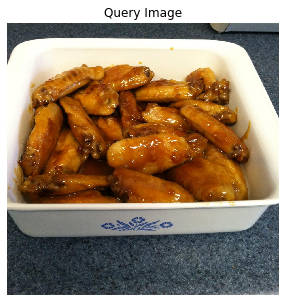

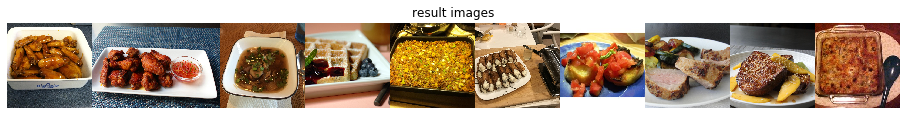

In [437]:
#We can get similar images and test recipe similarity score on them alone

inp = 1000
names = list(image_emdb.keys())
query = image_emdb[names[inp]]
print(names[inp])

distances = []
for i in range(len(names)):
    dot = np.dot(query, image_emdb[names[i]])
    norma = np.linalg.norm(query)
    normb = np.linalg.norm(image_emdb[names[i]])
    cos = dot / (norma * normb)
    distances.append(cos)
    #distances.append(np.linalg.norm(query-image_emdb[names[i]]))

#print(distances)
dist_indices = sorted(range(len(distances)), key=lambda k: distances[k])[-10:][::-1]
#print(dist_indices)
for i in dist_indices:
    print(names[i])

pred_image_names = []
    
def get_concatenated_images(indexes, thumb_height):
    thumbs = []
    for idx in indexes:
        #img = image.load_img("test/"+file_names[idx]) #+file_names[idx])
        img = image.load_img("data/"+names[idx].split('\\')[0]+'/'+names[idx].split('\\')[1]) #+file_names[idx])
        pred_image_names.append(names[idx])
        img = img.resize((int(img.width * thumb_height / img.height), thumb_height))
        thumbs.append(img)
    concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)
    return concat_image

query_image = image.load_img("data/" + names[inp].split('\\')[0]+'/'+names[inp].split('\\')[1])
results_image = get_concatenated_images(dist_indices, 400)

# display the query image
matplotlib.pyplot.figure(figsize = (5,5))
plt.axis('off')
plt.imshow(query_image)
matplotlib.pyplot.title("Query Image");

#image.load_img(file_names[0])

# display the resulting images
matplotlib.pyplot.figure(figsize = (16,12))
plt.axis('off')
plt.imshow(results_image)
matplotlib.pyplot.title("result images");


In [439]:
pred_image_names

['chicken_wings\\39.jpg',
 'chicken_wings\\13.jpg',
 'hot_and_sour_soup\\7.jpg',
 'waffles\\38.jpg',
 'oysters\\29.jpg',
 'cannoli\\8.jpg',
 'bruschetta\\42.jpg',
 'pork_chop\\29.jpg',
 'french_fries\\42.jpg',
 'oysters\\9.jpg']

In [438]:
#Now compare ingredient similarity with these images
ingr_embd.keys()
len(query)
similar_images_ingr = []
for i in dist_indices:
    #similar_images_ingr.append(pred[names.index('\\'.join(names[i].split('\\')))])
    similar_images_ingr.append(pred[names.index('\\'.join(names[i].split('\\')))])


a = query
similarity_scores = []
for i in range(len(similar_images_ingr)):
    ingr = similar_images_ingr[i]
    #print(i, training_names[i])
    # manually compute cosine similarity
    dot = np.dot(a, ingr)
    norma = np.linalg.norm(a)
    normb = np.linalg.norm(ingr)
    cos = dot / (norma * normb)
    similarity_scores.append(cos)

similarity_scores.index(max(similarity_scores))
print(pred_image_names[similarity_scores.index(max(similarity_scores))])

#Get top 10 recipe predictions
top_recipe_idx = sorted(range(len(similarity_scores)), key=lambda i: similarity_scores[i])[-10:]
for idx in top_recipe_idx[::-1]:
    print(pred_image_names[idx], similarity_scores[idx])

cannoli\8.jpg
cannoli\8.jpg 0.9763405729506243
bruschetta\42.jpg 0.9730884766296538
chicken_wings\13.jpg 0.970059567404169
waffles\38.jpg 0.9670325427475038
chicken_wings\39.jpg 0.9653378497905534
oysters\9.jpg 0.9609097755111695
pork_chop\29.jpg 0.9464812557167429
hot_and_sour_soup\7.jpg 0.9431165040520453
french_fries\42.jpg 0.9333389206569587
oysters\29.jpg 0.9257544742803394


In [422]:
print(similar_images_ingr[0])
print(pred[names.index('chicken_wings\\39.jpg')])

[0.        0.        1.5033292 ... 0.        0.        0.7453731]
[0.        0.        1.5033292 ... 0.        0.        0.7453731]


In [ ]:
#Run image classification and from that get category and run similarity on all the items in that category... 